In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AB_NYC_2019 CLEANING DATA.csv")

### 1.DATA INTEGRITY 

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


The dataset consist of 48895 entries with 16 columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###### UNIQUE VALUES CONTAINED IN THE DATASET 

In [5]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values[:5]}...") 
    print("-" * 50)


Column: id
Unique Values (48895): [2539 2595 3647 3831 5022]...
--------------------------------------------------
Column: name
Unique Values (47906): ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']...
--------------------------------------------------
Column: host_id
Unique Values (37457): [2787 2845 4632 4869 7192]...
--------------------------------------------------
Column: host_name
Unique Values (11453): ['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']...
--------------------------------------------------
Column: neighbourhood_group
Unique Values (5): ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']...
--------------------------------------------------
Column: neighbourhood
Unique Values (221): ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']...
--------------------------------------------------
Column: latitude
Un

### 2. HANDLING MISSING VALUES 

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#fill the two columns with missing values with unknown and not_avaialable. 
df["name"] = df["name"].fillna("Unknown")
df["host_name"] = df["host_name"].fillna("not_avaialable")


In [8]:
df['last_review'].fillna("no_ review", inplace=True)

In [9]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].median())

##### The following are to futher verify if the null values have been  correctly removed. 

In [10]:
# check for null values to see if the changes were made 
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
print(df.dtypes)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### 3. CHECK FOR DUPLICATES

In [12]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")


Number of duplicate rows: 0


There are no duplicates found in the dataset 


In [13]:
print(f"Original dataset size: {df.shape[0]} rows")


Original dataset size: 48895 rows


In [14]:
# the dataset is still intact 

### 4. OUTLIER DETECTION / REMOVAL

In [15]:
#summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.238930,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.520861,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### WE APPLY SKEW TO SEE COLUMNS WITH EXTREEME VALUES/ OUTLIERS. 

In [16]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns


In [17]:
#  skew data 
print(df[numerical_cols].skew())

id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.603699
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64


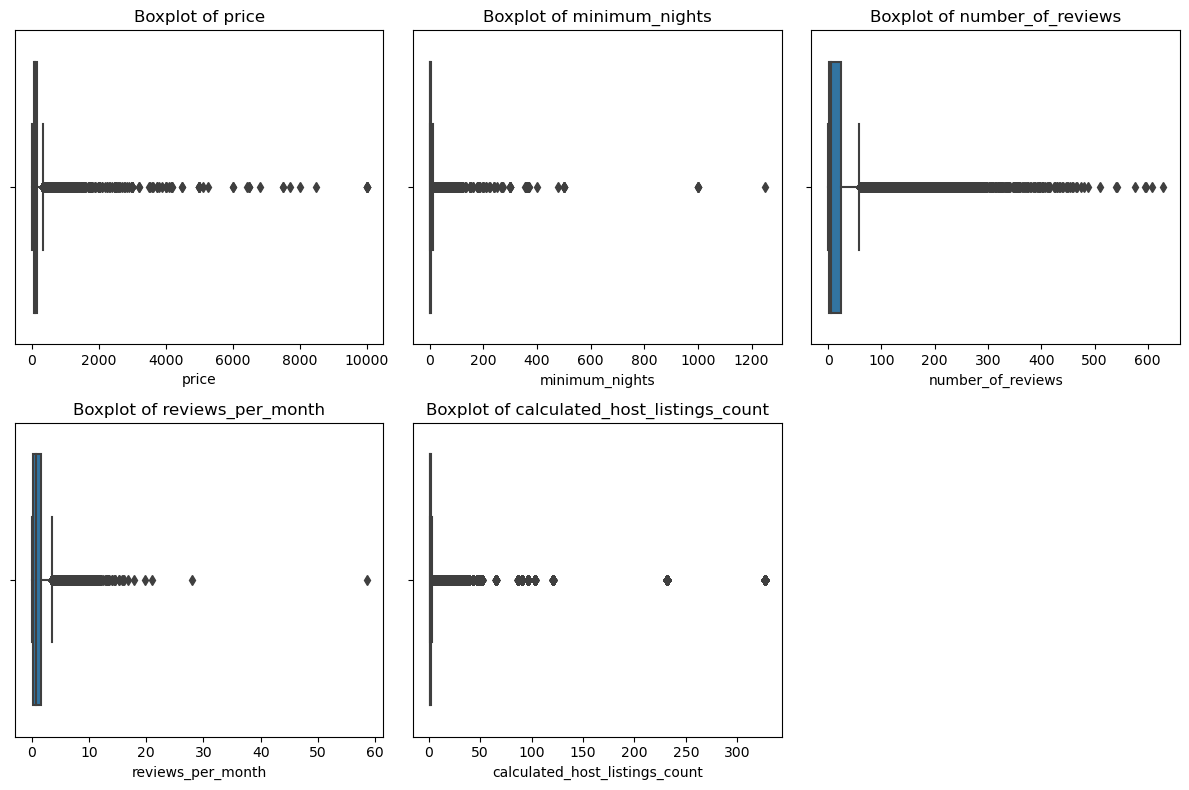

In [18]:
# List of numerical columns.
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Creating boxplots for each numerical column
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(data=df, x=col)  
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


##### OUTLIER DETECTION AND REMOVAL FOR PRICE COLUMN

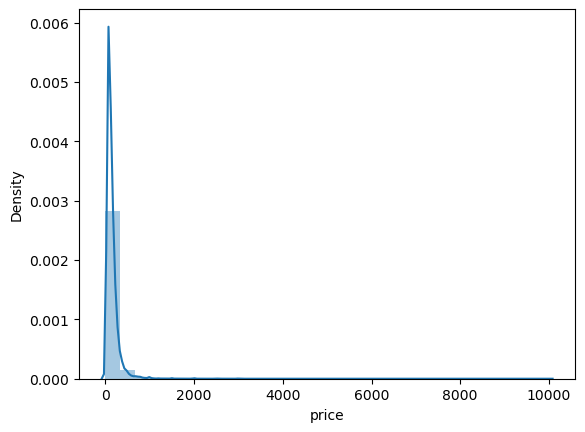

In [19]:
#show the distplot of price column to see how the data are skewed.
sns.distplot(df['price'], bins=30, kde=True)
plt.show()

<Axes: >

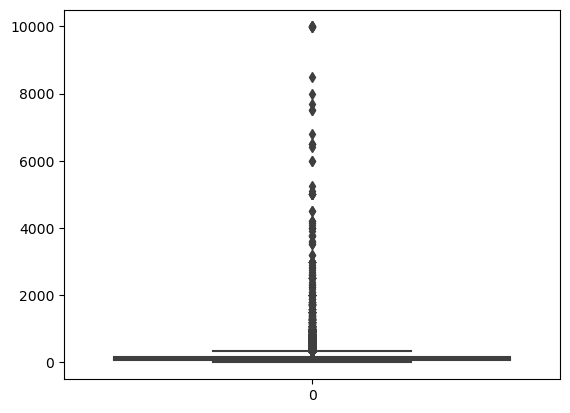

In [20]:
# view outlier clearly with boxplot
sns.boxplot(df["price"])

### we will be trying  different method to remove outliers to see the one that best work for the dataset.

#### Z-SCORE

In [21]:
# Defining outlier threshold, while computing the mean and standard deviation.  

# find the limits. 
upper_limit = df["price"]. mean() + 3*df["price"].std()
lower_limit = df["price"]. mean() -3*df["price"].std()
print(upper_limit, lower_limit)

873.1831964283906 -567.7418220547329


In [22]:
# finding outliers values for price:

In [23]:
#display the outlier values 
df.loc[(df["price"]> upper_limit) | (df["price"] < lower_limit)] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,no_ review,0.72,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,no_ review,0.72,1,0
1414,634353,Luxury 1Bed with Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.53,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48301,36186719,Private Bedroom in the Heart of Chelsea!,268920555,Terrence Jake,Manhattan,Chelsea,40.74531,-73.99454,Private room,999,30,0,no_ review,0.72,1,270
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,no_ review,0.72,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,no_ review,0.72,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,no_ review,0.72,1,349


In [24]:
# remove outliers where price is less than lower_limit or greater than upper_limit.
new_df = df.loc[(df["price"] <= upper_limit) & (df["price"] >=  lower_limit)] 
print("old_data:", len(df))
print("new_data:", len(new_df))
print('outliers:', len(df)-len(new_df))

old_data: 48895
new_data: 48507
outliers: 388


<Axes: >

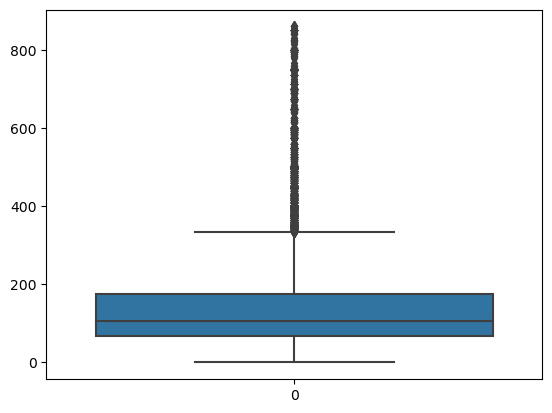

In [25]:
sns.boxplot(new_df['price'])

###### CAPPING METHOD - changing outlier values to upper or lower limit values. 

In [26]:
new_df.loc[(new_df['price']> upper_limit), 'price'] = upper_limit
new_df.loc[(new_df['price']< lower_limit), 'price'] = lower_limit

<Axes: >

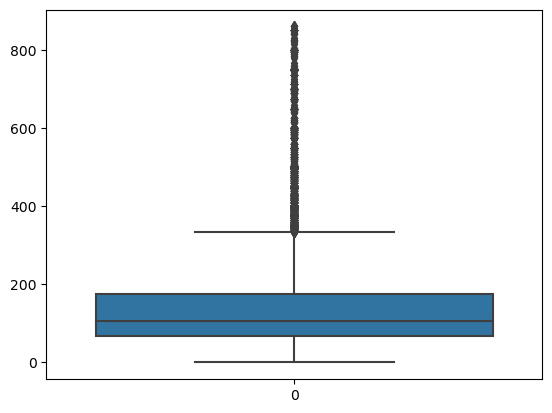

In [27]:
sns.boxplot(new_df['price'])

<Axes: xlabel='price', ylabel='Density'>

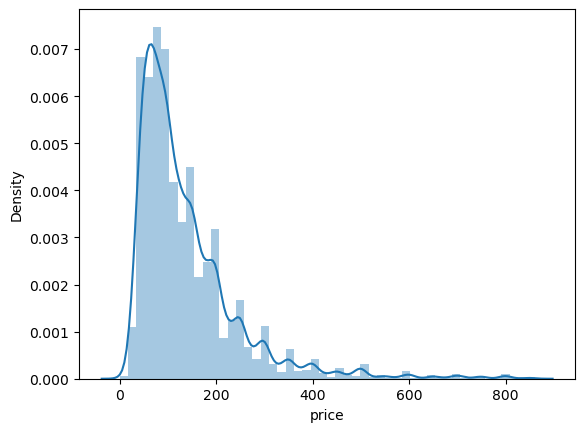

In [28]:
sns.distplot(new_df['price'])

In [29]:
len(new_df)

48507

In [30]:
# Identify numerical columns
numerical_cols = new_df.select_dtypes(include=['number']).columns


In [31]:
print(new_df[numerical_cols].skew())

id                                -0.090125
host_id                            1.207032
latitude                           0.242170
longitude                          1.281469
price                              2.449516
minimum_nights                    22.336587
number_of_reviews                  3.679972
reviews_per_month                  3.596062
calculated_host_listings_count     7.909199
availability_365                   0.770302
dtype: float64


## IQR method. 

##### 2,  INTERQUARTILE RANGE METHOD (IQR)

In [32]:
#define the quartikes q1 , q2 and q3
q1 = df['price']. quantile(0.25)
q3 = df['price']. quantile(0.75)
iqr = q3 - q1

In [33]:
print('q1:', q1, 'q3:', q3, iqr)

q1: 69.0 q3: 175.0 106.0


In [34]:
upper_limit = q3 +(1.5* iqr)
lower_limit = q1 -(1.5* iqr)
lower_limit, upper_limit

(-90.0, 334.0)

<Axes: >

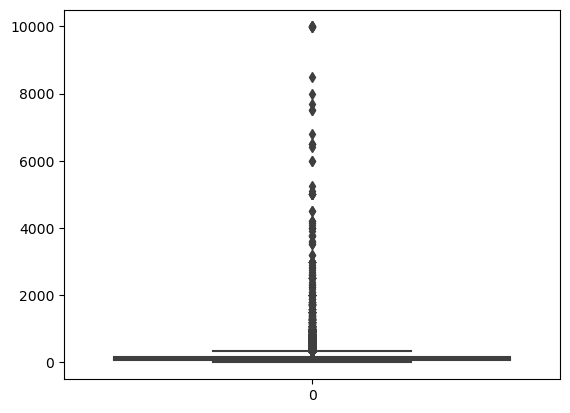

In [35]:
#view the original shape of the data 
sns.boxplot(df['price'])

In [36]:
# Find outliers 
df.loc[(df["price"]> upper_limit) | (df["price"] < lower_limit)] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,no_ review,0.72,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,no_ review,0.72,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,no_ review,0.72,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,no_ review,0.72,1,9


In [37]:
### trim the data
new_df = df.loc[(df["price"] <= upper_limit) & (df["price"] >=  lower_limit)] 
print("old_data:", len(df))
print("new_data:", len(new_df))
print('outliers:', len(df)-len(new_df))

old_data: 48895
new_data: 45923
outliers: 2972


#### This method has a better way of finding outliers with outliers of 4483

<Axes: >

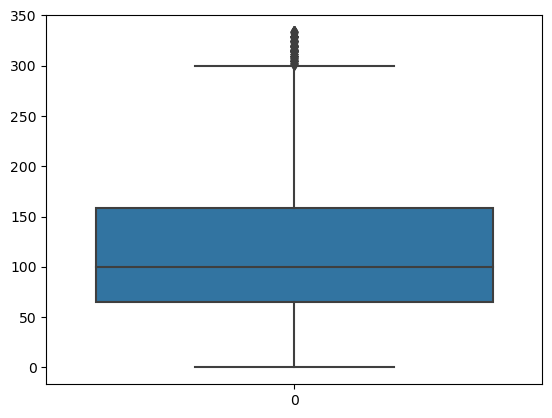

In [38]:
#view the new shape of the data 
sns.boxplot(new_df['price'])

In [39]:
### capping 
new_df = df.copy()
new_df.loc[(new_df['price']> upper_limit), 'price'] = upper_limit
new_df.loc[(new_df['price']< lower_limit), 'price'] = lower_limit

<Axes: >

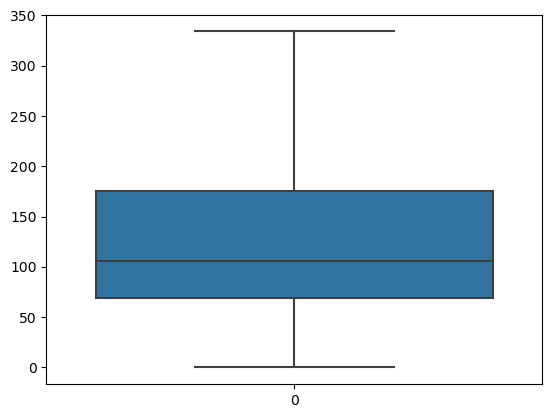

In [40]:
#display the shape of the data
sns.boxplot(new_df['price'])

####  There are no outliers present after capping, unlike the z-sccore which shows some outliers

<Axes: xlabel='price', ylabel='Density'>

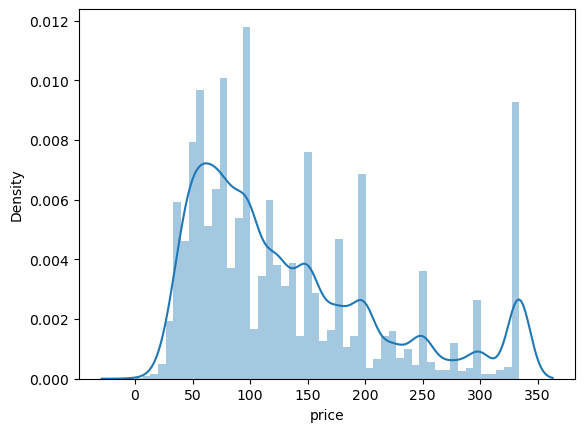

In [41]:
sns.distplot(new_df['price'])

###### 3. PERCENTILE METHOD


In [42]:
upper_limit = df['price'].quantile(0.99)
lower_limit = df['price'].quantile(0.001)
lower_limit, upper_limit

(18.0, 799.0)

<Axes: >

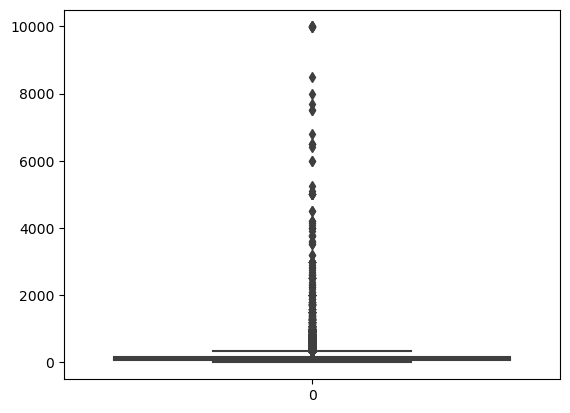

In [43]:
sns.boxplot(df['price'])

In [44]:
#find outliers 
df.loc[(df["price"]> upper_limit) | (df["price"] < lower_limit)] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,2019-07-02,1.37,1,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,no_ review,0.72,1,270
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,no_ review,0.72,1,349
48535,36311055,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,no_ review,0.72,1,303


In [45]:
### trim to delete the outliers 
new_df = df.loc[(df["price"] <= upper_limit) & (df["price"] >=  lower_limit)] 
print("old_data:", len(df))
print("new_data:", len(new_df))
print('outliers:', len(df)-len(new_df))

old_data: 48895
new_data: 48373
outliers: 522


<Axes: >

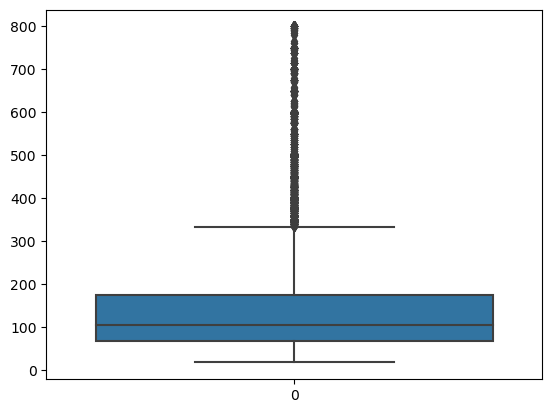

In [46]:
sns.boxplot(new_df['price'])

In [47]:
### capping 
new_df = df.copy()
new_df.loc[(new_df['price']> upper_limit), 'price'] = upper_limit
new_df.loc[(new_df['price']< lower_limit), 'price'] = lower_limit

<Axes: >

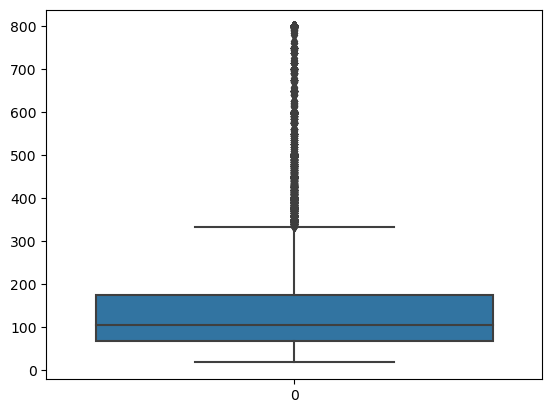

In [48]:
sns.boxplot(new_df['price'])

<Axes: xlabel='price', ylabel='Density'>

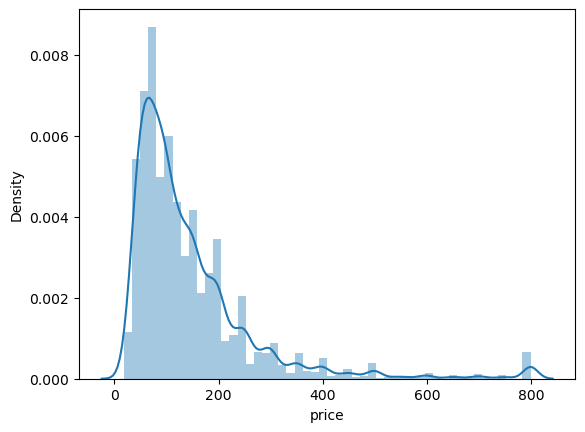

In [49]:
sns.distplot(new_df['price'])

<Axes: xlabel='price', ylabel='Density'>

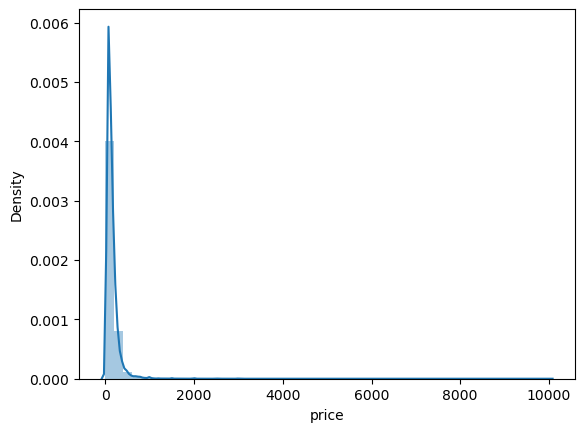

In [50]:
## displot from previos data 
sns.distplot(df['price'])

### The percentie method cant be seen as the best method of outlier removal for this dataset. 

### USING THE IQR METHOD TO REMOVE OUTLIERS FOR ALL THE SKEWED COLUMNS

In [52]:
# Function to cap (trim) outliers using IQR

def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside the IQR range
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

#creating a dataframe 
skewed_columns = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Cap outliers using the IQR method
df_capped = cap_outliers_iqr(df, skewed_columns)

# Final dataframe after capping the outliers
print(df_capped)


             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

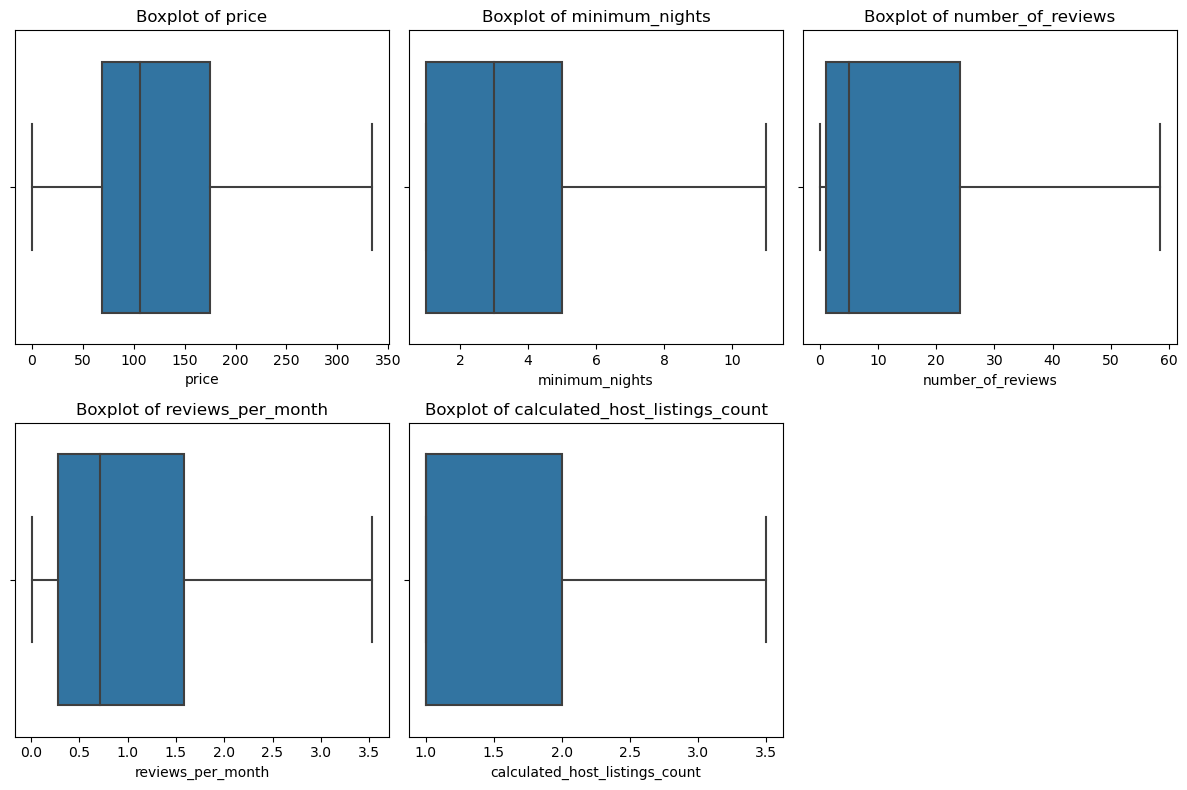

In [53]:
# List of numerical columns
numericals = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(numericals, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(data=df_capped, x=col)  
    plt.title(f'Boxplot of {col}')  

plt.tight_layout() 
plt.show()


In [54]:
print(df_capped[numericals].skew())

price                             1.022770
minimum_nights                    1.286117
number_of_reviews                 1.228974
reviews_per_month                 1.155219
calculated_host_listings_count    1.153611
dtype: float64


In [55]:
df_capped.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,2018-10-19,0.21,3.5,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,2019-05-21,0.38,2.0,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0.0,no_ review,0.72,1.0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58.5,2019-07-05,3.53,1.0,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9.0,2018-11-19,0.10,1.0,0


In [56]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,2018-10-19,0.21,3.5,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,2019-05-21,0.38,2.0,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0.0,no_ review,0.72,1.0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58.5,2019-07-05,3.53,1.0,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9.0,2018-11-19,0.10,1.0,0


In [57]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  float64
 12  last_review                     

In [58]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.00000,48895.00000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,132.979753,3.82532,15.67419,1.107321,1.614920,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,83.530504,3.32072,20.34953,1.088510,0.946883,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.00000,0.00000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.00000,1.00000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.00000,5.00000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.00000,24.00000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.00000,58.50000,3.530000,3.500000,365.000000


In [59]:
df_capped.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.00000,48895.00000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,132.979753,3.82532,15.67419,1.107321,1.614920,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,83.530504,3.32072,20.34953,1.088510,0.946883,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.00000,0.00000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.00000,1.00000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.00000,5.00000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.00000,24.00000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.00000,58.50000,3.530000,3.500000,365.000000
